<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Математика для data sciense. Нетология.

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [3]:
a = np.array([[2, 1 , 1], [1, 3, 0], [1, 2, 0]])
b = np.array([4, 5, 6])

x = np.linalg.solve(a, b)
x

array([  8.,  -1., -11.])

In [4]:
# проверка
np.allclose(np.dot(a, x), b)

True

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

$$\left\{\begin{matrix}
y = 20 + 0.25*x\\ 
y = 40 + 0.08*x
\end{matrix}\right.$$

Или:

$$\left\{\begin{matrix}
0.25*x - y = -20\\ 
0.08*x - y = -40
\end{matrix}\right.$$

Матрица A будет представлена следующими весами:

$$\boldsymbol{A}=\begin{bmatrix}
0.25 & -1\\ 
0.08 & -1
\end{bmatrix}$$

Вектор b будет выглядеть следующим образом:
$$b=\begin{bmatrix}
-20\\ 
-40\end{bmatrix}$$

Система уравнений в матричной форме выглядит следующим образом:
$$\begin{bmatrix}
0.25 & -1\\ 
0.08 & -1
\end{bmatrix}\cdot \begin{bmatrix}
x\\ 
y
\end{bmatrix}=\begin{bmatrix}
-20\\ 
-40
\end{bmatrix}$$

In [88]:
A = np.array([[0.25, -1], [0.08, -1]])
b = np.array([[-20], [-40]])

In [90]:
# Обратная матрица
A_inv = np.linalg.inv(A)
A_inv

array([[ 5.88235294, -5.88235294],
       [ 0.47058824, -1.47058824]])

In [91]:
# Решение
x = A_inv.dot(b)
x

array([[117.64705882],
       [ 49.41176471]])

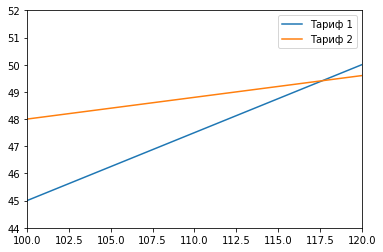

In [98]:
# Графически
x = np.arange(0, 200)
y1 = 20 + 0.25 * x
y2 = 40 + 0.08 * x

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(100, 120)
plt.ylim(44, 52)
plt.legend(['Тариф 1','Тариф 2'])
plt.show()
plt.close()

Как видно при x = 117 (количество минут разговора в месяц) оба тарифа будут стоить 49 долларов. При общении меньше 117 минут в месяц, исходя из графика видно, что дешевле будет стоить тариф 1.

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [6]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bos_pd = pd.DataFrame(boston.data)
bos_pd.columns = boston.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


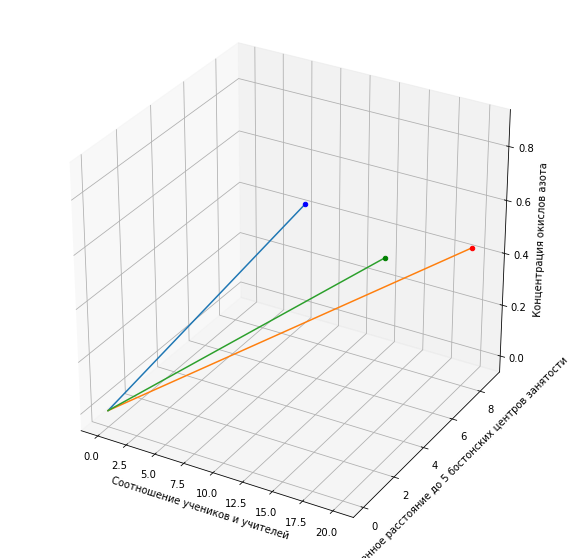

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(bos_pd['PTRATIO'])
y = np.array(bos_pd['DIS'])
z = np.array(bos_pd['NOX'])

ax.plot([0,x[150]], [0,y[150]], [0,z[150]])
ax.plot([0,x[350]], [0,y[350]], [0,z[350]])
ax.plot([0,x[450]], [0,y[450]], [0,z[450]])

ax.scatter(x[150], y[150], z[150], c='b', marker='o')
ax.scatter(x[350], y[350], z[350], c='r', marker='o')
ax.scatter(x[450], y[450], z[450], c='g', marker='o')

ax.set_xlabel('Соотношение учеников и учителей')
ax.set_ylabel('Взвешенное расстояние до 5 бостонских центров занятости')
ax.set_zlabel('Концентрация окислов азота')

plt.show()

Рассчитаем детерминант матрицы выбранных трех домов. Если он не равен 0, следовательно, данные векторы не компланарны.

In [9]:
a = np.array(bos_pd.loc[150, ['PTRATIO', 'DIS', 'NOX']])
b = np.array(bos_pd.loc[350, ['PTRATIO', 'DIS', 'NOX']])
c = np.array(bos_pd.loc[450, ['PTRATIO', 'DIS', 'NOX']])

In [10]:
a

array([14.7  ,  1.618,  0.871])

In [11]:
a = np.transpose([a])
b = np.transpose([b])
c = np.transpose([c])

In [12]:
a

array([[14.7  ],
       [ 1.618],
       [ 0.871]])

In [13]:
m = np.hstack((a, b, c))
m

array([[14.7   , 19.7   , 20.2   ],
       [ 1.618 ,  8.7921,  2.3236],
       [ 0.871 ,  0.429 ,  0.713 ]])

In [16]:
# детерминант
np.linalg.det(m)

-46.02777527000002

Детерминант отличается от нуля, следовательно, векторы не компланарны.

Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [30]:
A = m
A

array([[14.7   , 19.7   , 20.2   ],
       [ 1.618 ,  8.7921,  2.3236],
       [ 0.871 ,  0.429 ,  0.713 ]])

In [31]:
e_vals, e_vecs = LA.eig(A)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Собственные вектора: 
 [[-0.98474391 -0.85483534 -0.7936368 ]
 [-0.16648503  0.50743207 -0.01400257]
 [-0.05061777 -0.10848612  0.60823067]]
Собственные значения:  [19.06888623  5.56959588 -0.4333821 ]


In [67]:
Av = np.dot(A, e_vecs[:, 0])  
Av

array([-18.77796965,  -3.17468417,  -0.9652245 ])

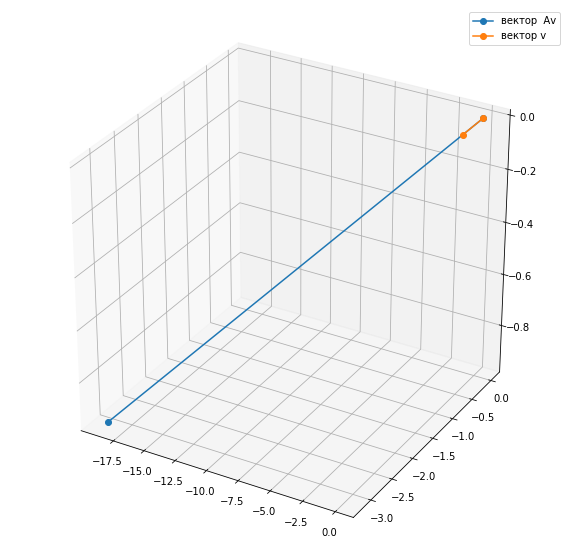

In [66]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot([0, Av[0]], [0, Av[1]], [0, Av[2]], '-o')
ax.plot([0, e_vecs[0][0]], [0, e_vecs[1][0]], [0, e_vecs[2][0]], '-o')
ax.legend(['вектор  Av', 'вектор v'])

In [68]:
# Во сколько раз Av отличается от v
e_vals[0]

19.06888622734509

Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

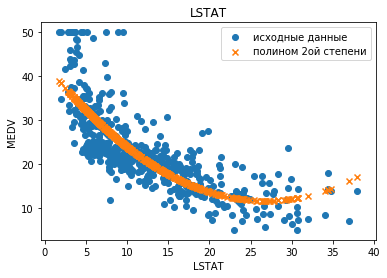

In [102]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

In [120]:
import scipy.integrate as spint
def f(x): 
    return 1+x+x**2 # полином 2 степени
a = min(x)
b = max(x)
print(spint.quad(f,a,b))

(19001.258952, 2.109563518537527e-10)
